In [37]:
! tree

.
├── animation.gif
├── Assignment 3.1.ipynb
├── Assignment 3.2.ipynb
├── Assignment 3-Copy1.2.ipynb
├── Cluster_lib.ipynb
├── Data
│   ├── cereal.xls
│   └── NewMBAdata.xlsx
├── import.py
├── k_mean.py
├── None0000000.png
├── output_1
│   ├── Initial_Data.png
│   ├── STEP_1.png
│   ├── STEP_2.png
│   ├── STEP_3.png
│   ├── STEP_4.png
│   ├── STEP_5.png
│   ├── STEP_6.png
│   ├── STEP_7.png
│   ├── STEP_8.png
│   └── STEP_9.png
├── output_2
│   ├── animation.gif
│   ├── Cereals.csv
│   ├── Initial_Data.png
│   ├── STEP_1.png
│   ├── STEP_2.png
│   └── STEP_3.png
└── __pycache__
    └── k_mean.cpython-36.pyc

4 directories, 27 files


# 1.1 Importing common libraries

In [38]:
# %load ../import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# 1.2 Imporitng custom library

In [39]:
from k_mean import k_mean
###Syntax:
# k_mean(df,X,N)
### INput
# df
# X
# N
### Output
# df : moddified with all steps 
# iteration: number of iteration

from k_mean import pca_retirever
### Syntax
# pca_retirever(df, X)
### INput
#df
#X
### Output
#df



from k_mean import plotter
### Syntax
# plotter(df, iteration)
### INput
# df
# iteration
### Output
# anim : plt object


from k_mean import final_answer
### Syntax
# final_answer(df, iteration,y, file_name, output_dir):

### INput
# df
# iteration
# y
# file_name

### Output
# df_out: 
# file daved at location


from k_mean import plot_printer
# def plot_printer(df, iteration, output_dir):

### INput
# df
# iteration
# output_dir


# 2. Question 

#### 1.      The file NewMBAdata.xlsx contains average undergrad GPA, average GMAT score, percentage acceptance rate, average starting salary, and out of state tuition and fees for 54 top MBA programs. Use this data to perform a cluster analysis with five anchors.

# 3. Importing data  

In [40]:
df=pd.read_excel("./Data/NewMBAdata.xlsx")
df.head()

,Rank,School,11 full-time average undergrad GPA,11 full-time average GMAT score,11 full-time acceptance rate,11 average starting salary and bonus,11 out-of-state tution and fees
0,1,Harvard University,3.66,724,11.1,139735,60610
1,2,Standford University,3.70,730,7.0,140972,55200
2,3,University of Pennsylvania,3.56,718,18.8,137311,58244
3,4,Massachusetts Institute of Technology,3.51,710,13.3,132618,52900
4,5,Northwestern University,3.54,712,21.1,130092,54225


In [41]:
df.columns

Index(['Rank', 'School', '11 full-time average undergrad GPA',
       '11 full-time average GMAT score', '11 full-time acceptance rate',
       '11 average starting salary and bonus',
       '11 out-of-state tution and fees'],
      dtype='object')

# 4. Setting Parameters 


## 4.1 Renaming columns

In [42]:
df.columns=['rank', 'school', 'gpa',
       'gmat','salary',
       'acceptance',
       'fees']
df.columns
df.head()

,rank,school,gpa,gmat,salary,acceptance,fees
0,1,Harvard University,3.66,724,11.1,139735,60610
1,2,Standford University,3.70,730,7.0,140972,55200
2,3,University of Pennsylvania,3.56,718,18.8,137311,58244
3,4,Massachusetts Institute of Technology,3.51,710,13.3,132618,52900
4,5,Northwestern University,3.54,712,21.1,130092,54225


## 4.2 Identyfying X

In [43]:
X=['gpa',
       'gmat','salary',
       'acceptance',
       'fees']
df[X].head()

,gpa,gmat,salary,acceptance,fees
0,3.66,724,11.1,139735,60610
1,3.70,730,7.0,140972,55200
2,3.56,718,18.8,137311,58244
3,3.51,710,13.3,132618,52900
4,3.54,712,21.1,130092,54225


## 4.3 Identyfying y

In [44]:
y=["school"]
df[y].head()

,school
0,Harvard University
1,Standford University
2,University of Pennsylvania
3,Massachusetts Institute of Technology
4,Northwestern University


## 4.4 Setup Numbe of cluster, here: 5

In [45]:
N=5

# 5. Starting K-Mean Clustering algo

In [46]:
df, iteration=k_mean(df,X,N)
df.head()

,rank,school,gpa,gmat,salary,acceptance,fees,step_1,ecd_1,step_2,ecd_2,step_3,ecd_3
0,1,Harvard University,0.92,0.939394,0.065391,0.984187,1.000000,5,0.348969,5,0.359667,5,0.359667
1,2,Standford University,1.00,1.000000,0.000000,1.000000,0.891822,5,0.459930,5,0.454313,5,0.454313
2,3,University of Pennsylvania,0.72,0.878788,0.188198,0.953200,0.952689,5,0.136015,5,0.137947,5,0.137947
3,4,Massachusetts Institute of Technology,0.62,0.797980,0.100478,0.893208,0.845831,5,0.134518,5,0.104087,5,0.104087
4,5,Northwestern University,0.68,0.818182,0.224880,0.860918,0.872326,5,0.156577,5,0.055227,5,0.055227


# 6. Using PCA to reduce dimension for 2D plotting: 
#### Top 2 Principal componenet will be used

In [47]:
df=pca_retirever(df, X )
df.head()

,rank,school,gpa,gmat,salary,acceptance,fees,step_1,ecd_1,step_2,ecd_2,step_3,ecd_3,pca1,pca2
0,1,Harvard University,0.92,0.939394,0.065391,0.984187,1.000000,5,0.348969,5,0.359667,5,0.359667,1.721383,-0.023126
1,2,Standford University,1.00,1.000000,0.000000,1.000000,0.891822,5,0.459930,5,0.454313,5,0.454313,1.777007,0.101424
2,3,University of Pennsylvania,0.72,0.878788,0.188198,0.953200,0.952689,5,0.136015,5,0.137947,5,0.137947,1.546428,-0.176050
3,4,Massachusetts Institute of Technology,0.62,0.797980,0.100478,0.893208,0.845831,5,0.134518,5,0.104087,5,0.104087,1.426247,-0.170443
4,5,Northwestern University,0.68,0.818182,0.224880,0.860918,0.872326,5,0.156577,5,0.055227,5,0.055227,1.406152,-0.152496


# 7. Plotting 

<IPython.core.display.Javascript object>


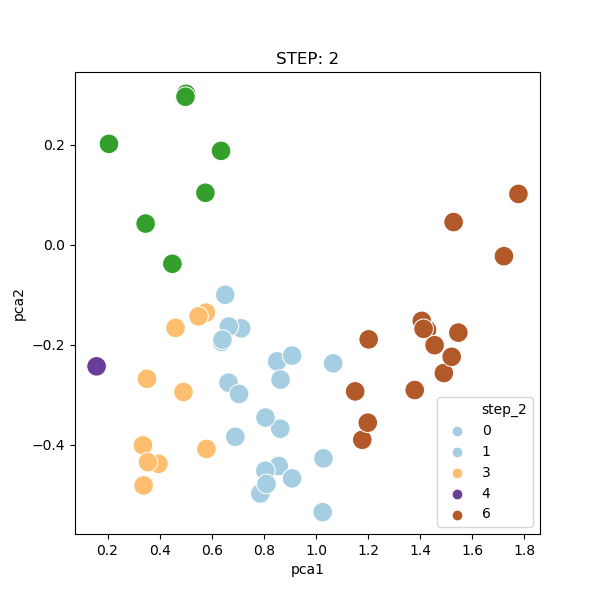

In [48]:
%matplotlib notebook

anim=plotter(df, iteration, "output_1")


# 8. Final Results 

In [49]:
df_out=final_answer(df, iteration, "school", "University", "output_1")
col="step_"+str(iteration-1)
df_out.groupby([col,"school"]).count()

index
step_3 school                                        
1      Arizona State University                     1
       Boston University                            1
       Carnegie Mellon University                   1
       Cornell University                           1
       Emory University                             1
       Georgetown University                        1
       Georgia Institute of Technology              1
       Indiana University-Bloomington               1
       Ohio State University                        1
       Rice University                              1
       U. of North Carolina-Chapel Hill             1
       University of California-Davis               1
       University of Minnesota-Twin Cities          1
       University of Notre Dame                     1
       University of Rochester                      1
       University of Southern California            1
       University of Texas-Austin                   1
       University of Washington                     1
       University of Wisconsin-Madison              1
       Vanderbuilt University                       1
       Washington University in St. Louis           1
2      Brigham Young University                     1
       Temple University                            1
       Texas A&M University-College Station         1
       University of Arkansas-Fayetteville          1
       University of Florida                        1
       University of Illinois-Urbana-Champaign      1
       University of Texas-Dallas                   1
3      Boston College                               1
       Michigan State University                    1
       Pennsylvania State Univ.-Univ. Park          1
       Purdue University                            1
       Southern Methodist University                1
       Tulane University                            1
       University of California-Irvine              1
       University of Iowa                           1
       University of Maryland-College Park          1
       Wake Forest University                       1
4      Case Western Reserve Univ.                   1
5      Columbia University                          1
       Dartmouth College                            1
       Duke University                              1
       Harvard University                           1
       Massachusetts Institute of Technology        1
       New York University                          1
       Northwestern University                      1
       Standford University                         1
       University of California-Berkeley            1
       University of California-Los Angeles         1
       University of Chicago                        1
       University of Michigan-Ann Arbor             1
       University of Pennsylvania                   1
       University of Virginia                       1
       Yale University                              1

# 9. Conclusion

* Most colleges comes under group 5 or 2 all of which are small univerisity
* Harward, Standford and Berkely are almost diffrent from other clusters
* We know that Harvard Standford and Berkely are few best institute, hence our clustering shows the same.